In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import cv2

In [4]:
video_frame_samples_dirs = [x[0] for x in os.walk("../data/video_frame_samples")][1:]

In [5]:
video_frame_samples_dirs

['../data/video_frame_samples\\test_video_0',
 '../data/video_frame_samples\\test_video_1',
 '../data/video_frame_samples\\test_video_10',
 '../data/video_frame_samples\\test_video_11',
 '../data/video_frame_samples\\test_video_12',
 '../data/video_frame_samples\\test_video_13',
 '../data/video_frame_samples\\test_video_14',
 '../data/video_frame_samples\\test_video_15',
 '../data/video_frame_samples\\test_video_16',
 '../data/video_frame_samples\\test_video_17',
 '../data/video_frame_samples\\test_video_18',
 '../data/video_frame_samples\\test_video_19',
 '../data/video_frame_samples\\test_video_2',
 '../data/video_frame_samples\\test_video_20',
 '../data/video_frame_samples\\test_video_3',
 '../data/video_frame_samples\\test_video_4',
 '../data/video_frame_samples\\test_video_5',
 '../data/video_frame_samples\\test_video_6',
 '../data/video_frame_samples\\test_video_7',
 '../data/video_frame_samples\\test_video_8',
 '../data/video_frame_samples\\test_video_9']

#### loading ocr results and generate features

In [6]:
def create_img_df(image_dir: str):
    img_files = list(Path(image_dir).glob("*.jpg"))
    img_file_dict = {int(file.name.split(".")[0]): cv2.imread(str(file), cv2.IMREAD_GRAYSCALE) 
                 for file in img_files}
    total_pixals = img_file_dict[0].shape[0] * img_file_dict[0].shape[1]
    
    img_keys = sorted(img_file_dict)
    diff_dict = {}
    for index in range(len(img_keys)-1):
        diff_pixal = np.sum(img_file_dict[img_keys[index+1]] != img_file_dict[img_keys[index]])
        diff_percent = np.round(diff_pixal/2073600,3)
        diff_dict[img_keys[index+1]] = {'diff_pixal':diff_pixal, 'diff_percent':diff_percent}
    diff_df = pd.DataFrame.from_dict(diff_dict, orient='index').reset_index()
    return diff_df

In [7]:
import os 
import sys

from paddleocr import PaddleOCR,draw_ocr

import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

ocr = PaddleOCR(rec_model_dir="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/",
               det_model_dir="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/",
                rec_char_dict_path="C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ppocr/utils/en_dict.txt"
               )

def img_resize(img, scale: int=60):
    scale_percent = 60 # percent of original size
    width = int(img.shape[1] * scale_percent / 100)
    height = int(img.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized

Namespace(cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\alistar/.paddleocr/cls', cls_thresh=0.9, det=True, det_algorithm='DB', det_db_box_thresh=0.5, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.6, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ch_ppocr_server_v2.0_det_infer/', drop_score=0.5, enable_mkldnn=False, gpu_mem=8000, image_dir='', ir_optim=True, label_list=['0', '180'], lang='ch', max_text_length=25, rec=True, rec_algorithm='CRNN', rec_batch_num=6, rec_char_dict_path='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/ppocr/utils/en_dict.txt', rec_char_type='ch', rec_image_shape='3, 32, 320', rec_model_dir='C:/Users/alistar/Desktop/ds/PaddleOCR-release-2.1/models/en_number_mobile_v2.0_rec_infer/', use_angle_cls=False, use_dilation=False, use_gpu=True, use_pdserving=False, use_space_char=

In [9]:
import json

In [10]:
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

In [15]:
video_ocr_paths = list(Path("../data/video_frame_obj").glob("*.json"))

In [97]:
video_ocr_paths[1]

WindowsPath('../data/video_frame_obj/test_video_1.json')

In [87]:
with open(video_ocr_paths[1].absolute(), 'r') as file:
    test_ocr_results = json.load(file)

In [98]:
test_ocr_results['10']

[[[[29.0, 17.0], [327.0, 14.0], [328.0, 86.0], [30.0, 89.0]],
  ['#ODSCo', 0.8028609156608582]],
 [[[260.0, 220.0], [641.0, 220.0], [641.0, 254.0], [260.0, 254.0]],
  ['Machine Learning for', 0.9806168675422668]],
 [[[176.0, 269.0], [728.0, 270.0], [728.0, 306.0], [176.0, 304.0]],
  ['Real Time Streaming Data with', 0.9685929417610168]],
 [[[257.0, 319.0], [649.0, 319.0], [649.0, 353.0], [257.0, 353.0]],
  ['Kafka and TensorFlow', 0.9795848727226257]],
 [[[409.0, 372.0], [496.0, 375.0], [495.0, 397.0], [408.0, 394.0]],
  ['Yong Tang', 0.9512053728103638]],
 [[[301.0, 404.0], [601.0, 404.0], [601.0, 425.0], [301.0, 425.0]],
  ['Director of Engineering,Mobilelron', 0.9562868475914001]],
 [[[285.0, 434.0], [619.0, 434.0], [619.0, 451.0], [285.0, 451.0]],
  ['Maintainer and SIG IO LeadTensorFlow', 0.9631165266036987]],
 [[[379.0, 460.0], [528.0, 465.0], [528.0, 486.0], [378.0, 482.0]],
  ['GitHubyongtang', 0.989647388458252]]]

In [89]:
def get_paragraph(ocr_result: list, threshold: float=0.9):
    return " ".join(list(map(lambda lst: lst[-1][0],filter(lambda lst: lst[-1][-1] >threshold, ocr_result))))

In [90]:
test_ocr_paragraph = {int(frame): get_paragraph(ocr_result) for frame, ocr_result in test_ocr_results.items()}

In [91]:
from collections import OrderedDict

In [92]:
test_ocr_paragraph = OrderedDict(test_ocr_paragraph)

In [93]:
import spacy
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u'Hello hi there!')
doc2 = nlp(u'Hello hi there!')
doc3 = nlp(u'Hey whatsup?')
print (doc1.similarity(doc2)) # 0.999999954642
print (doc2.similarity(doc3)) # 0.699032527716
print (doc1.similarity(doc3)) # 0.699032527716

1.0
0.6919925450987855
0.6919925450987855


In [121]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    if union == 0:
        print(list1)
        print(list2)
        return 0
    return float(intersection) / union

In [119]:
img_keys = sorted(test_ocr_paragraph)
img_dict = {key: nlp(paragraph) for key, paragraph in test_ocr_paragraph.items()}
#img_dict = {key: paragraph.lower().split(" ") for key, paragraph in test_ocr_paragraph.items()}

In [213]:
# img_keys = sorted(img_dict)
# diff_dict = {}
# for index in range(len(img_keys)-1):
#     doc1 = img_dict[img_keys[index+1]]
#     doc2 = img_dict[img_keys[index]]
#     dissimilarity = 1 - doc1.similarity(doc2)
#     diff_dict[img_keys[index+1]] = {'dissimilarity': dissimilarity}
# diff_df = pd.DataFrame.from_dict(diff_dict, orient='index').reset_index()

img_keys = sorted(img_dict)
diff_dict = {}
for index in range(1, len(img_keys)):
    doc1 = img_dict[img_keys[index]]
    doc2 = img_dict[img_keys[index-1]]
    dissimilarity = 1 - doc1.similarity(doc2)
    
    
    paragraph1 = test_ocr_paragraph[img_keys[index]].lower().split(" ")
    paragraph2 = test_ocr_paragraph[img_keys[index-1]].lower().split(" ")
    similarity = jaccard(paragraph1, paragraph2)
    jaccard_dissimilarity = 1 - similarity
    frame_token_ct = len(paragraph2)
    word_dissim = np.abs(len(paragraph1) - len(paragraph2))/max(len(paragraph1), len(paragraph2))
    
    paragraph1 = list(test_ocr_paragraph[img_keys[index]].lower())
    paragraph2 = list(test_ocr_paragraph[img_keys[index-1]].lower())
    similarity = jaccard(paragraph1, paragraph2)
    jaccard_letter_dissimilarity = 1 - similarity
    
    letter_dissim = np.abs(len(paragraph1) - len(paragraph2))/max(len(paragraph1), len(paragraph2))
    
    
    diff_dict[img_keys[index]] = {'dissimilarity': dissimilarity, 'jaccard': jaccard_dissimilarity,
                                    'jaccard_letter':jaccard_letter_dissimilarity,
                                   'frame_token_ct': frame_token_ct,
                                   'word_dis': word_dissim,
                                   'letter_dissim': letter_dissim}
    
    
diff_df = pd.DataFrame.from_dict(diff_dict, orient='index').reset_index()

[]
[]
[]
[]
[]
[]
[]
[]


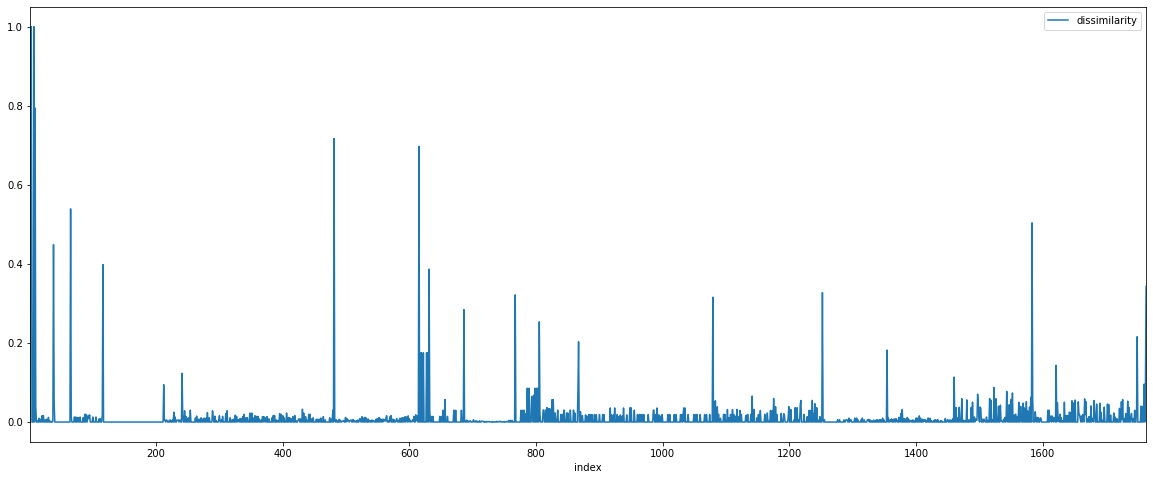

In [214]:
diff_df['min'] = diff_df['index']/60
diff_df.plot(x='index', y='dissimilarity',figsize=(20,8))
plt.show()

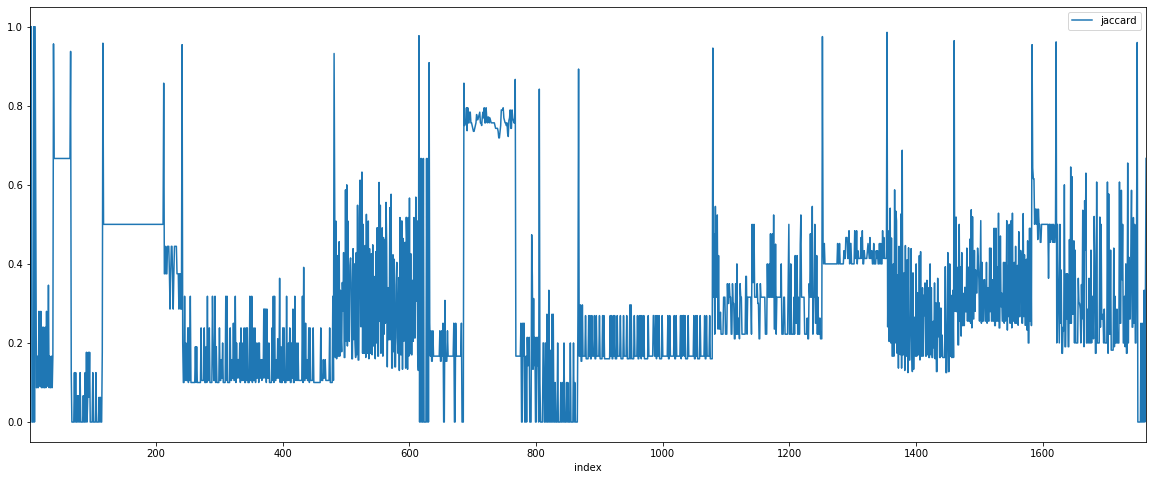

In [215]:
diff_df['min'] = diff_df['index']/60
diff_df.plot(x='index', y='jaccard',figsize=(20,8))
plt.show()

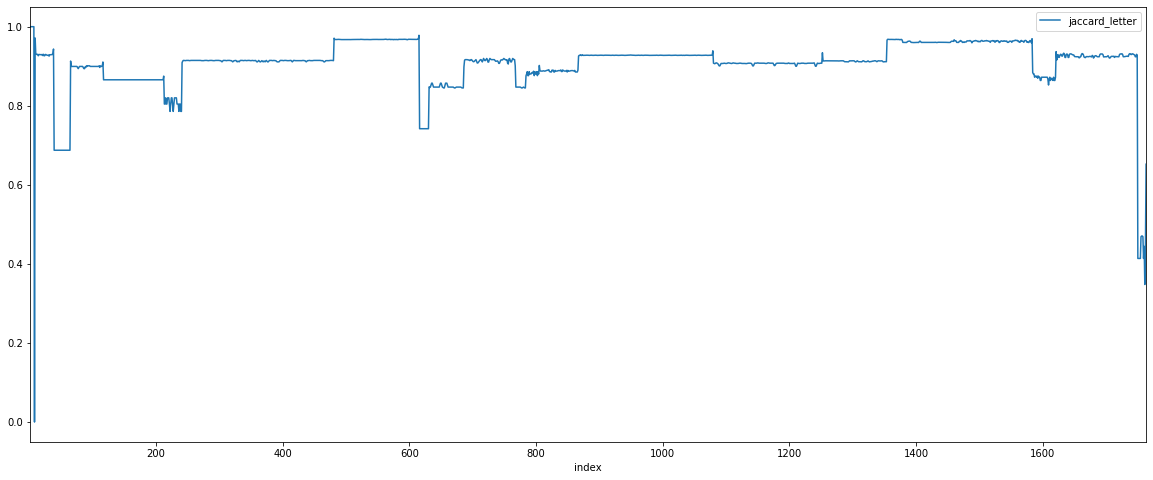

In [216]:
diff_df['min'] = diff_df['index']/60
diff_df.plot(x='index', y='jaccard_letter',figsize=(20,8))
plt.show()

In [217]:
pd.cut(diff_df['dissimilarity'], bins=np.arange(-0.1, 1.1, 0.1)).value_counts()

(-0.1, 0.0]    1115
(0.0, 0.1]      620
(0.1, 0.2]        9
(0.3, 0.4]        6
(0.2, 0.3]        4
(0.9, 1.0]        3
(0.7, 0.8]        2
(0.5, 0.6]        2
(0.6, 0.7]        1
(0.4, 0.5]        1
(1.0, 1.1]        0
(0.8, 0.9]        0
Name: dissimilarity, dtype: int64

In [218]:
test_ocr_paragraph[617], test_ocr_paragraph[618], test_ocr_paragraph[619]

('MotivationofDataPipelineinMI TensorFlow',
 'MotivationofDataPipelineinMI TensorFlow',
 'MotivationofDataPipelineinMl TensorFlow')

In [219]:
test_ocr_paragraph[616].lower(), test_ocr_paragraph[617].lower()

('motivationofdatapipelineinml tensorflow',
 'motivationofdatapipelineinmi tensorflow')

In [220]:
jaccard(test_ocr_paragraph[616].lower().split(" "), test_ocr_paragraph[617].lower().split(" "))

0.3333333333333333

In [221]:
jaccard(list(test_ocr_paragraph[616].lower()), list(test_ocr_paragraph[617].lower()))

0.25806451612903225

In [222]:
def jaccard_verbose(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    print(intersection)
    union = (len(list1) + len(list2)) - intersection
    print(union)
    if union == 0:
        print(list1)
        print(list2)
        return 0
    return float(intersection) / union

In [223]:
jaccard_verbose(list(test_ocr_paragraph[616].lower()), list(test_ocr_paragraph[617].lower()))

16
62


0.25806451612903225

In [224]:
diff_df.query("dissimilarity >= 0.1")

,index,dissimilarity,jaccard,jaccard_letter,frame_token_ct,word_dis,letter_dissim,min
1,2,1.000000,1.000000,1.000000,1,0.500000,1.000000,0.033333
2,3,1.000000,1.000000,1.000000,2,0.500000,1.000000,0.050000
6,7,1.000000,1.000000,1.000000,1,0.500000,1.000000,0.116667
8,9,0.794064,1.000000,0.971429,2,0.894737,0.947368,0.150000
37,38,0.448772,0.956522,0.943503,22,0.909091,0.873494,0.633333
64,65,0.539148,0.937500,0.913043,2,0.866667,0.798077,1.083333
115,116,0.398304,0.958333,0.910714,16,0.437500,0.289720,1.933333
240,241,0.123259,0.954545,0.909091,6,0.647059,0.666667,4.016667
480,481,0.717059,0.932203,0.970862,18,0.600000,0.782069,8.016667
614,615,0.697327,0.977273,0.978290,43,0.953488,0.945378,10.250000


In [103]:
diff_df.query("dissimilarity >= 0.1")

,index,dissimilarity,min
1,2,1.000000,0.033333
2,3,1.000000,0.050000
6,7,1.000000,0.116667
8,9,0.794064,0.150000
37,38,0.448772,0.633333
64,65,0.539148,1.083333
115,116,0.398304,1.933333
240,241,0.123259,4.016667
480,481,0.717059,8.016667
614,615,0.697327,10.250000


#### using pixal percent diff

In [23]:
img_df_lst = []
for image_dir in video_frame_samples_dirs:
    print(f"processing {image_dir}")
    img_df_lst.append(create_img_df(image_dir))

processing ../data/video_frame_samples\test_video_0
processing ../data/video_frame_samples\test_video_1
processing ../data/video_frame_samples\test_video_10
processing ../data/video_frame_samples\test_video_11
processing ../data/video_frame_samples\test_video_12
processing ../data/video_frame_samples\test_video_13
processing ../data/video_frame_samples\test_video_14
processing ../data/video_frame_samples\test_video_15
processing ../data/video_frame_samples\test_video_16
processing ../data/video_frame_samples\test_video_17
processing ../data/video_frame_samples\test_video_18
processing ../data/video_frame_samples\test_video_19
processing ../data/video_frame_samples\test_video_2
processing ../data/video_frame_samples\test_video_20
processing ../data/video_frame_samples\test_video_3
processing ../data/video_frame_samples\test_video_4
processing ../data/video_frame_samples\test_video_5
processing ../data/video_frame_samples\test_video_6
processing ../data/video_frame_samples\test_video_7
p

In [24]:
def pixal_diff_percent(img1: np.array, img2: np.array):
    assert img1.shape == img2.shape
    total_pixals = img1.shape[0] * img1.shape[1]
    return 

../data/video_frame_samples\test_video_0


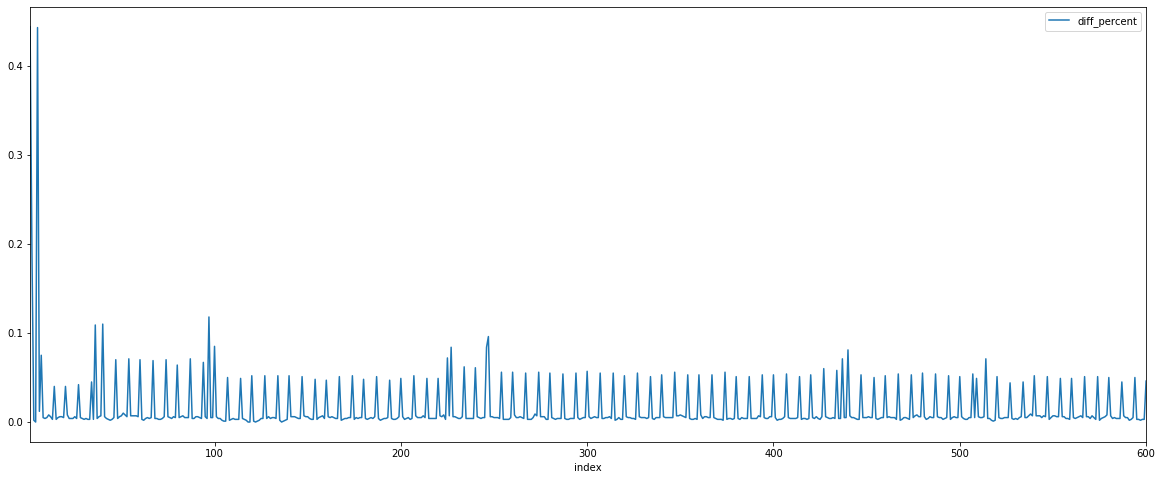

../data/video_frame_samples\test_video_1


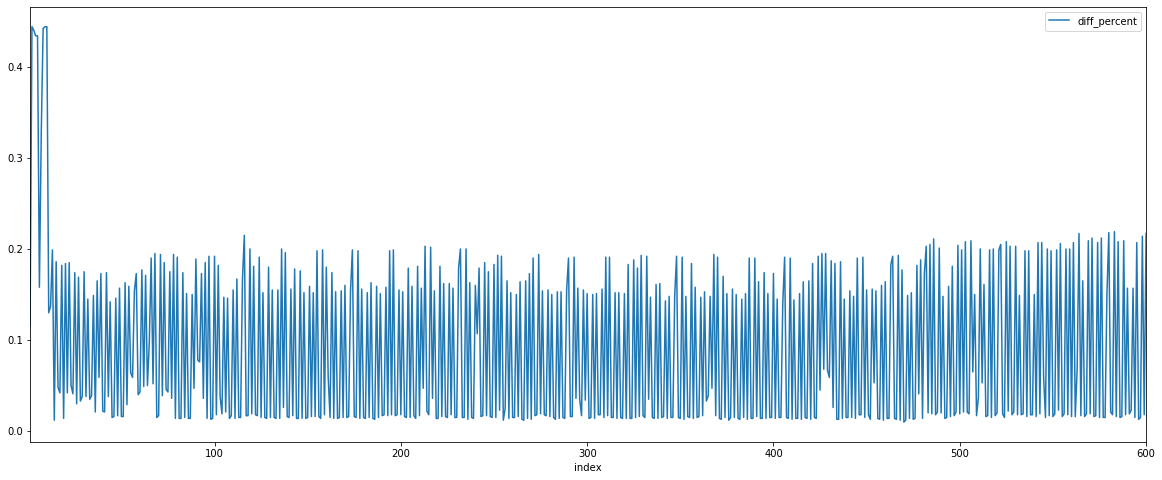

../data/video_frame_samples\test_video_10


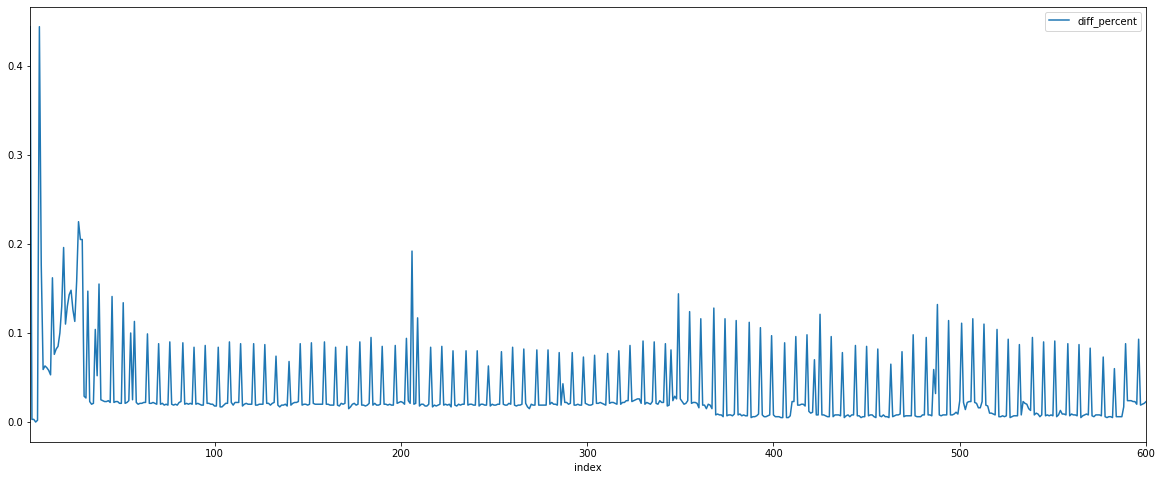

../data/video_frame_samples\test_video_11


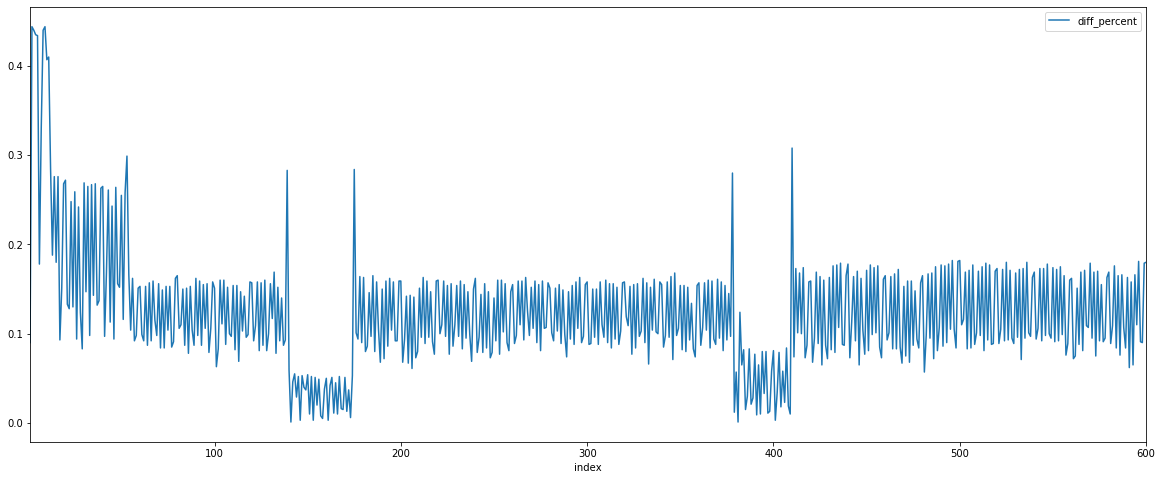

../data/video_frame_samples\test_video_12


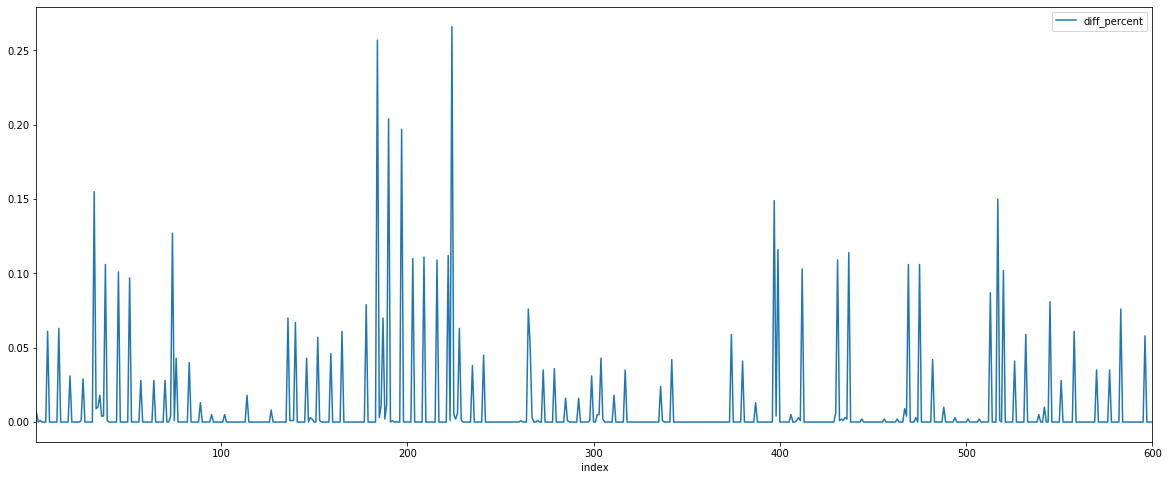

../data/video_frame_samples\test_video_13


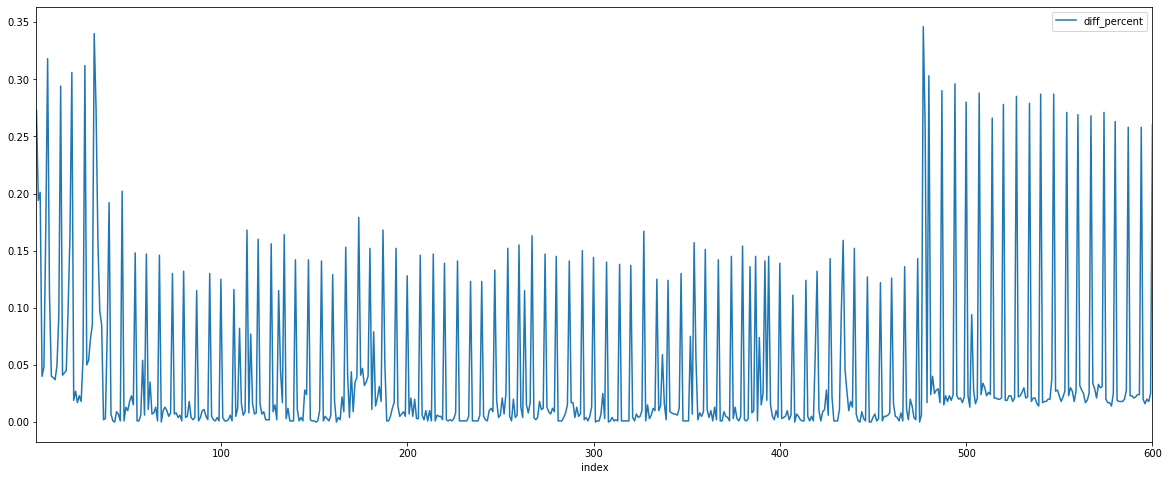

../data/video_frame_samples\test_video_14


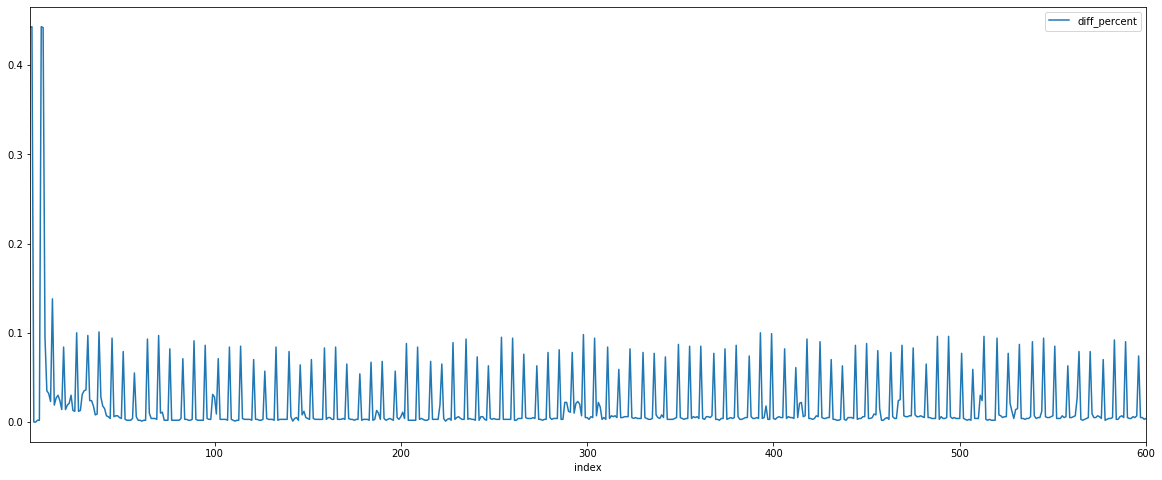

../data/video_frame_samples\test_video_15


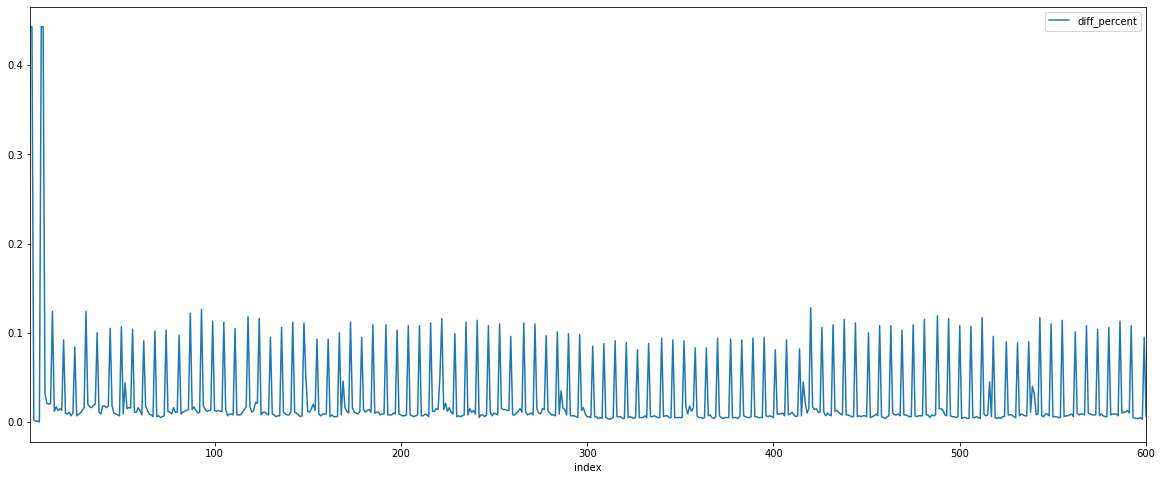

../data/video_frame_samples\test_video_16


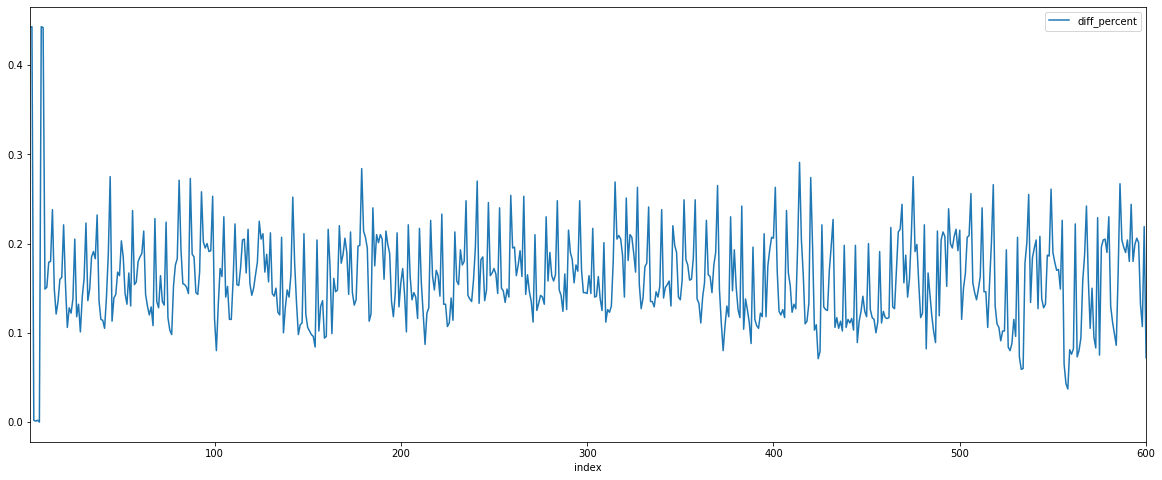

../data/video_frame_samples\test_video_17


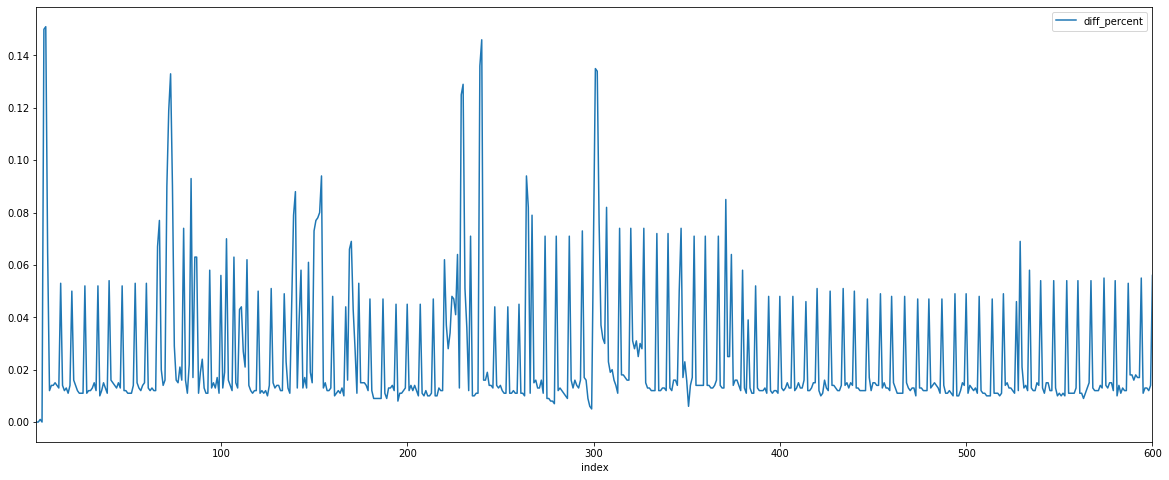

../data/video_frame_samples\test_video_18


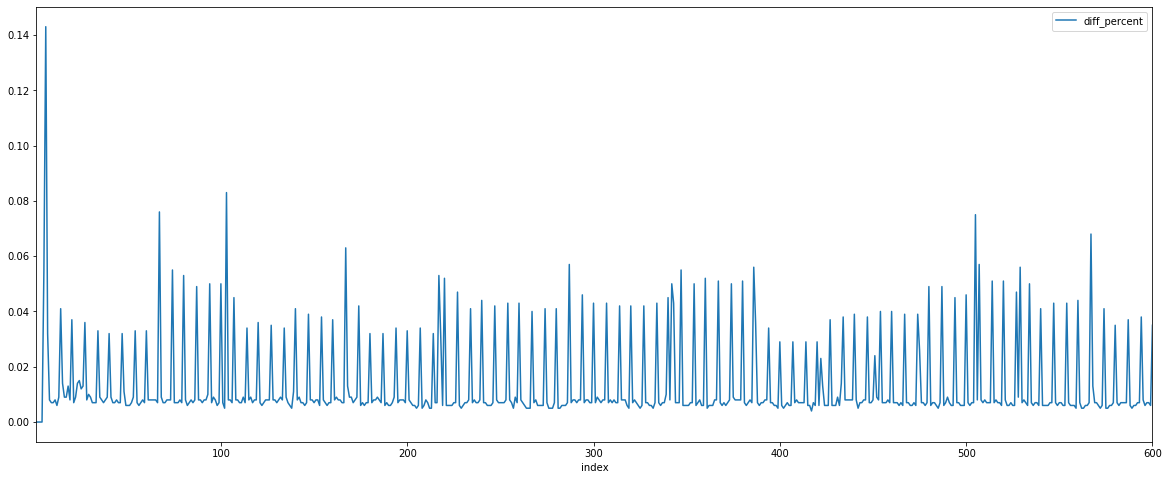

../data/video_frame_samples\test_video_19


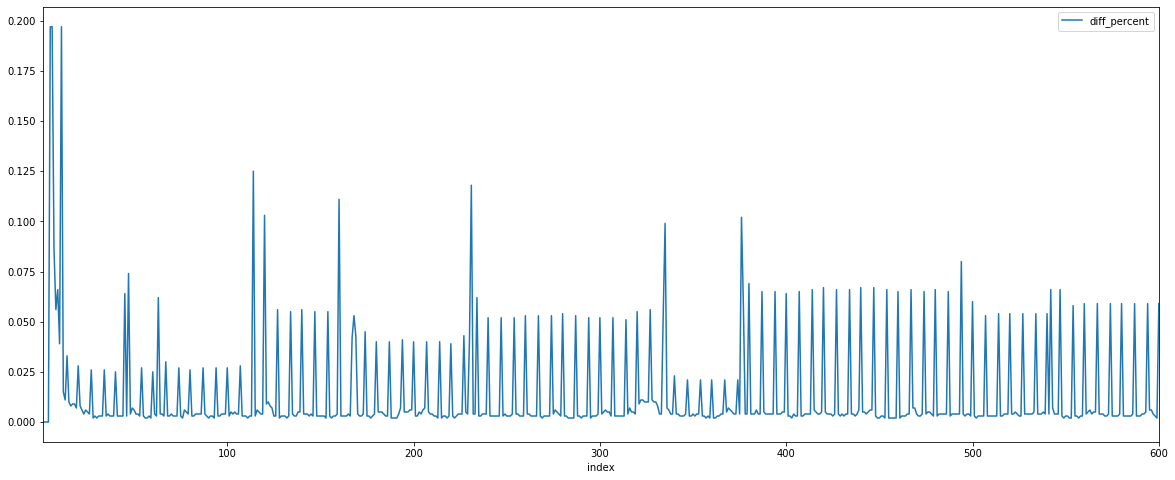

../data/video_frame_samples\test_video_2


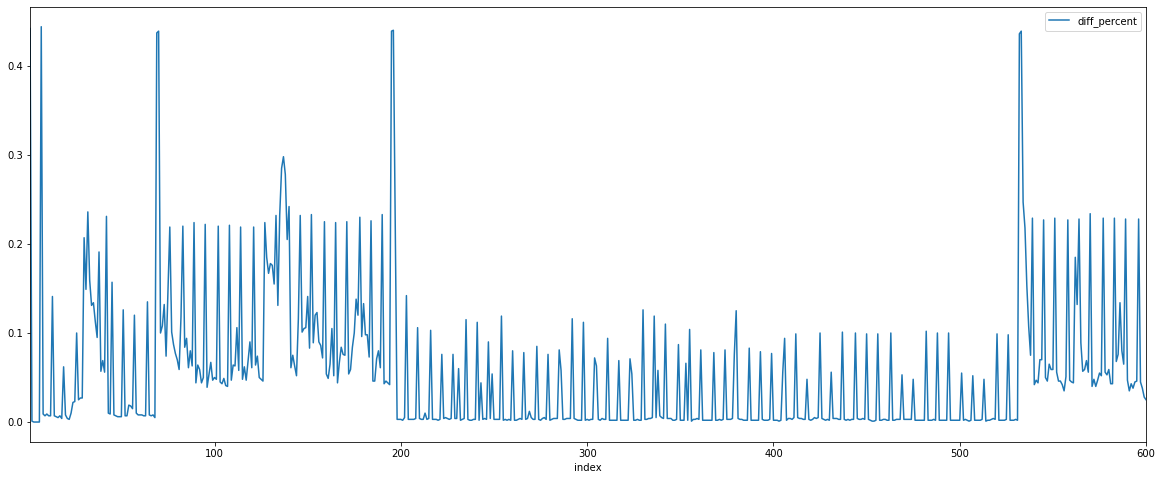

../data/video_frame_samples\test_video_20


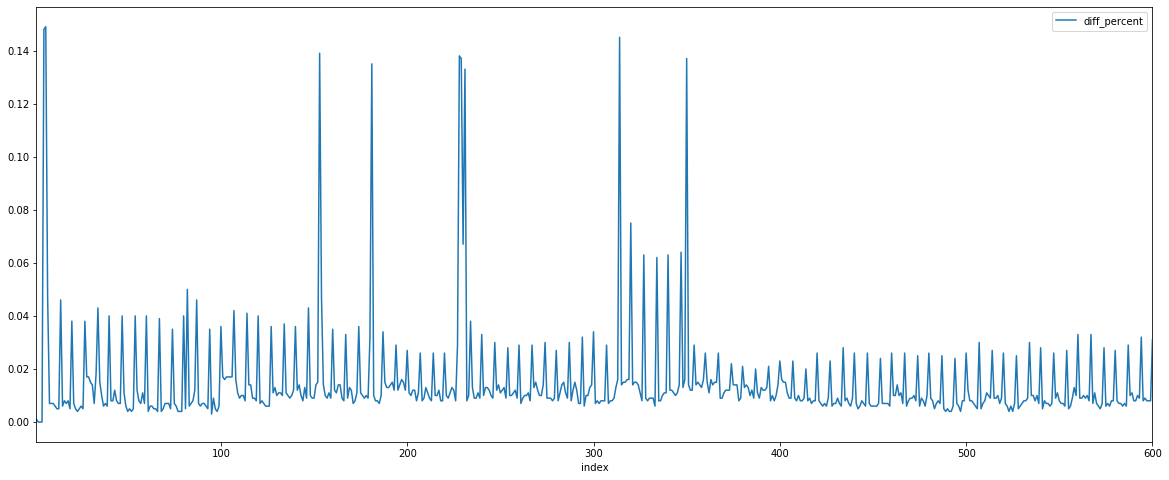

../data/video_frame_samples\test_video_3


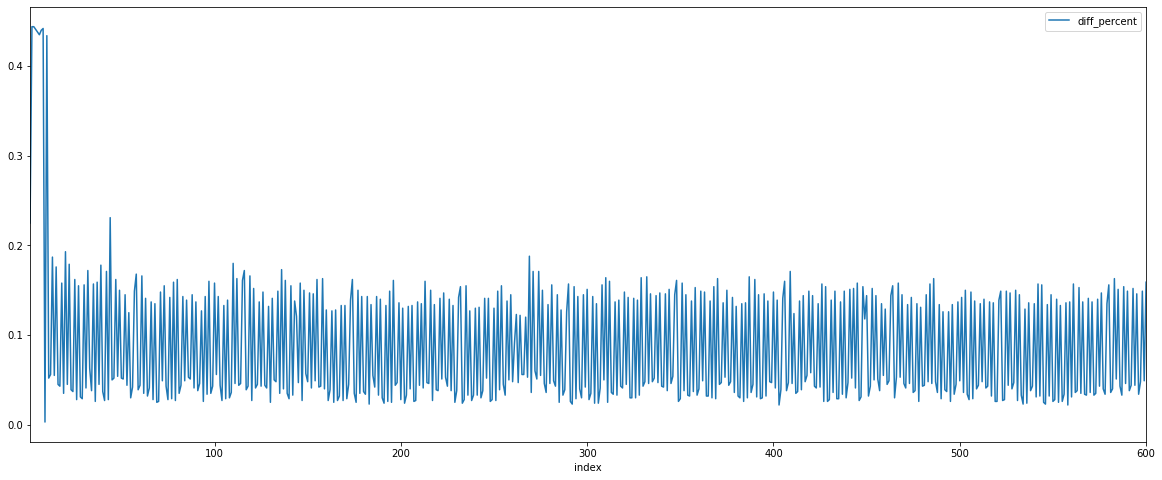

../data/video_frame_samples\test_video_4


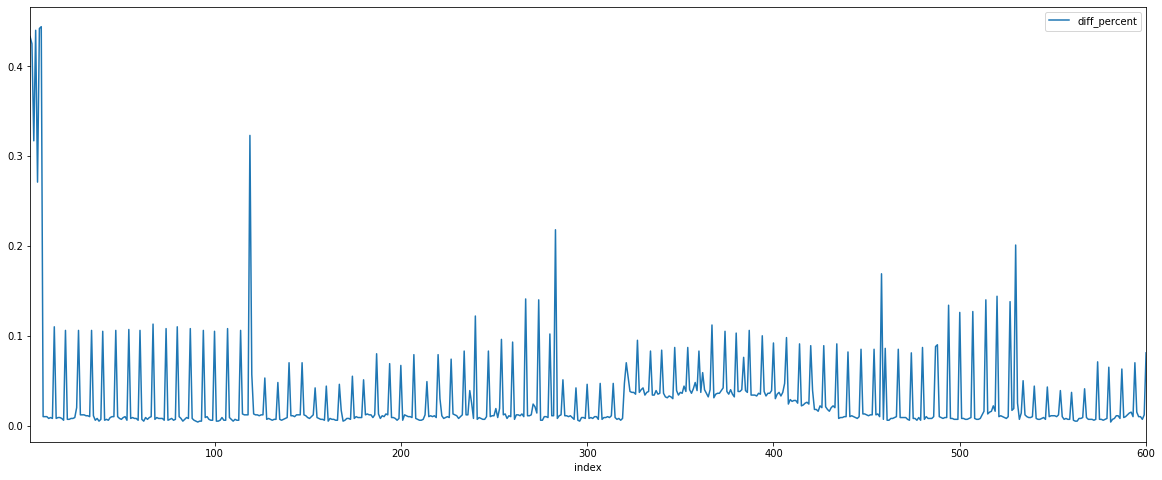

../data/video_frame_samples\test_video_5


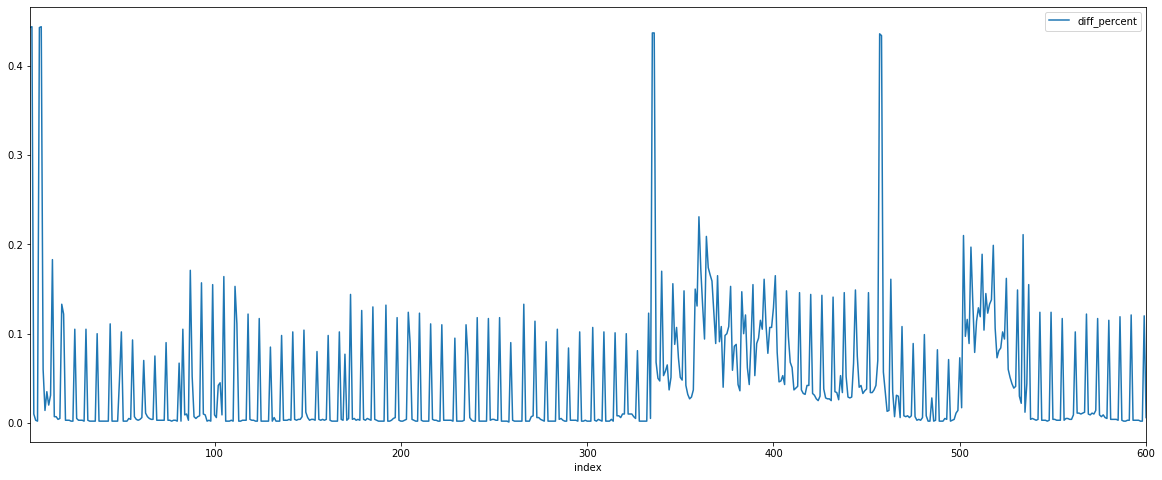

../data/video_frame_samples\test_video_6


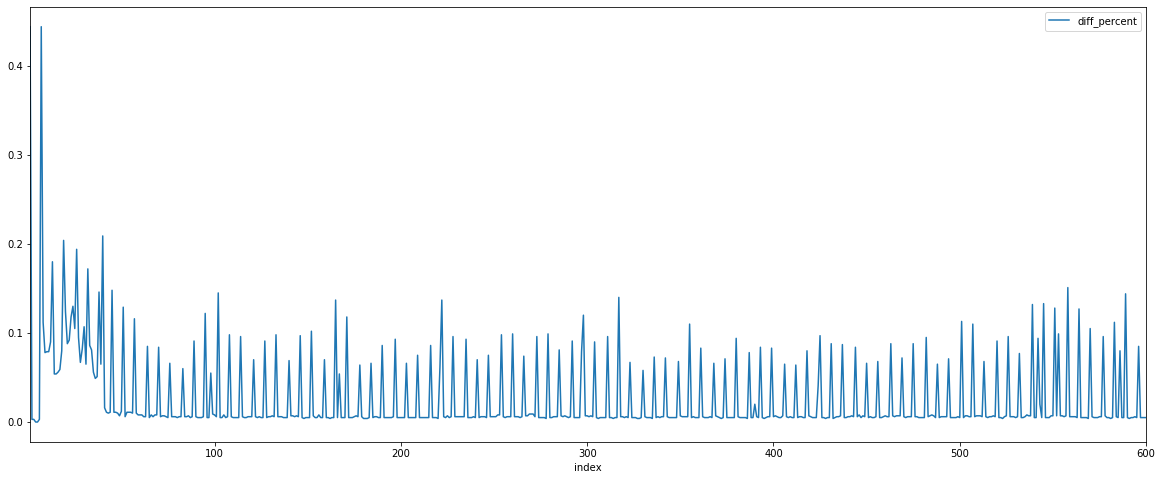

../data/video_frame_samples\test_video_7


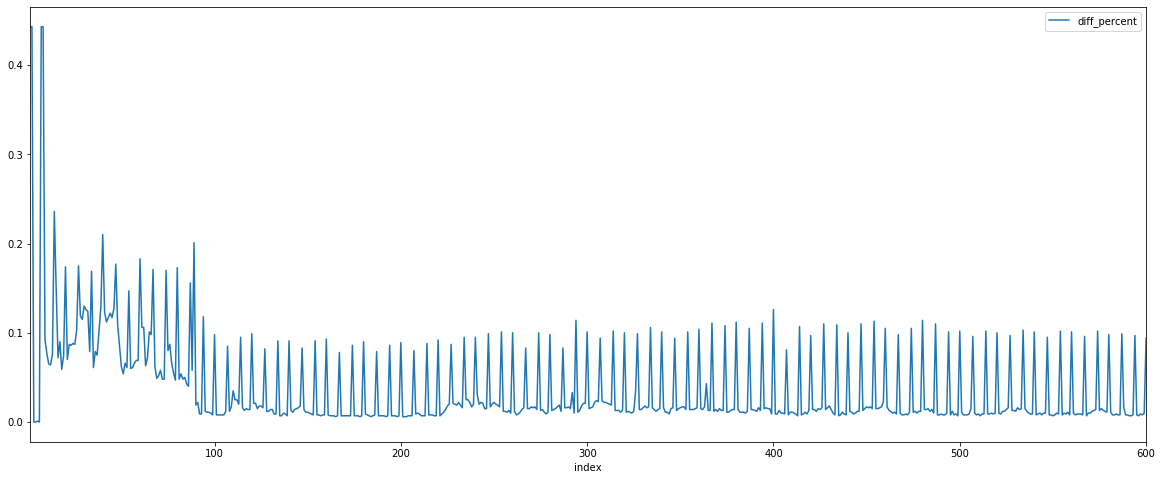

../data/video_frame_samples\test_video_8


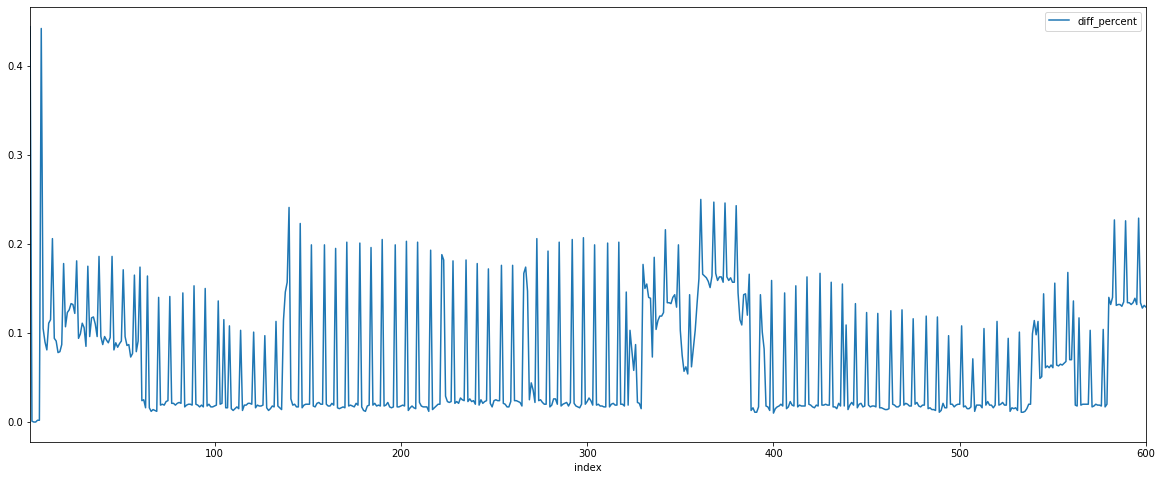

../data/video_frame_samples\test_video_9


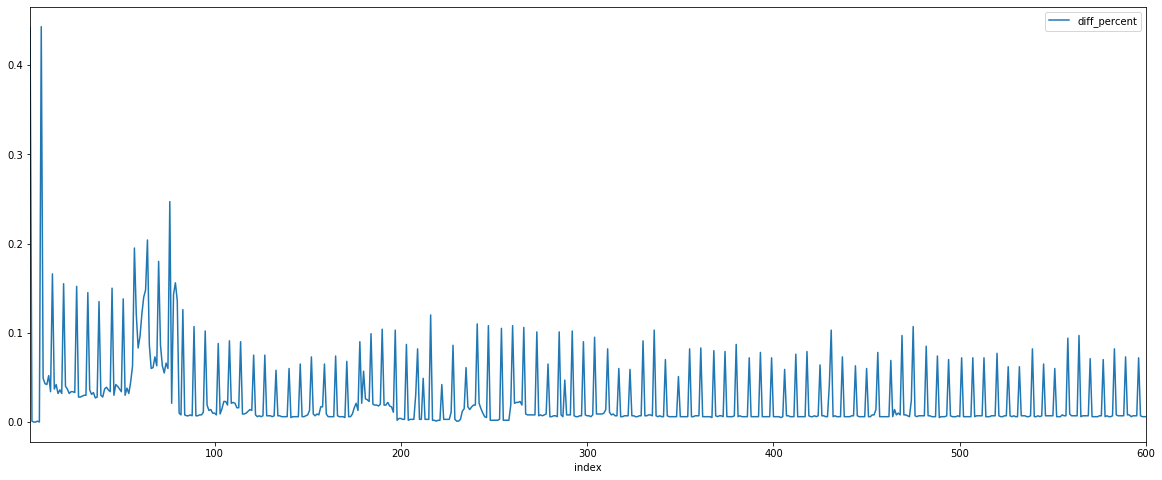

In [37]:
for i in range(len(img_df_lst)):
    print(video_frame_samples_dirs[i])
    diff_df = img_df_lst[i]
    diff_df['min'] = diff_df['index']/60
    diff_df.head(600).plot(x='index', y='diff_percent',figsize=(20,8))
    plt.show()